# __Descomposición de Valores Singulares (SVD)__

Es un método fundamental en el álgebra lineal que busca descomponer una matriz en otras matrices. Esta íntimamente relacionado con el hecho de diagonalizar una matriz simétrica. Su objetivo es obtener, a partir de la descomposición de matrices, la mejor aproximación de la matriz de datos inicial almacenando la menor cantidad de datos posibles.

Ejemplo, si contamos con un set de datos de 50 features, lo que se busca es con menos cantidad de features representar lo mejor posible los datos.

Es ampliamente utilizado en Machine Learning para la reducción de dimensionalidad, compresión de datos, procesamiento de imágenes y recomendadores.

## Cómo se calcula?

Supongamos que la matriz de datos original que deseamos descomponer es $M$ la cual puede ser rectangular $mxn$. Vamos a aprender cómo hacer la descomposición de la matriz mediante la siguiente visualización:

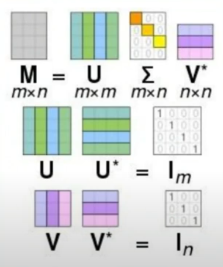

El método consiste en representar la matriz $M$ en las matrices $U$, $\Sigma$ y $V$, donde:

- $U$ es la matriz de vectores singulares que forman la base del espacio de $M$.

- Sigma ($\Sigma$) es una matriz diagonal cuyos valores son llamados valores singulares. Se calculan como la raíz cuadrada de los autovalores de $M$ traspuesto por $M$, ordenados decrecientemente. Representan la energía de cada componente de la descomposición.

- $V$ son los vectores singulares de $M$ traspuesto por $M$. Forman la base del espacio de los valores singulares.

A nivel espacial, $SVD$ lo que hace es descomponer la matriz $M$ en rotaciones ($U$ y $V$) y escalados ($\Sigma$)

## Obtener SVD de forma practica

In [1]:
# librerias
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd # metodo svd

Para el siguiente ejercicio hay que tener en cuenta los conceptos de _varianza_ y _bias_.

- La varianza mide que tan dispersos estan los datos
- El bias mide que tan acertados han sido los datos.

Vamos a crear una funcion que nos permita visualizar paso a paso la descomposicion SVD de una matriz _A_ que representa una imagen, mostrando su reconstruccion progresiva usando los autovalores.

In [2]:
vmin = 0
vmax = 1
image_bias = 1

def plot_svd(A):

    # longitud de A
    n=len(A)
    plt.imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    print('Imagen formada con la matriz de datos')
    plt.show()

    U, S, V = svd(A)
    print('Matriz U: \n \n', U,'\n \n')
    print('Matriz Sigma: \n \n', S,'\n \n')
    print('Matriz V: \n \n', V,'\n \n')

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=60)
    plt.show()

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U, S, V



La matriz que vamos a utilizar, corresponde a la visualizacion de un corazon.

In [3]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0]
              ])

Pasamos la matriz _D_ a la funcion creada

Imagen formada con la matriz de datos


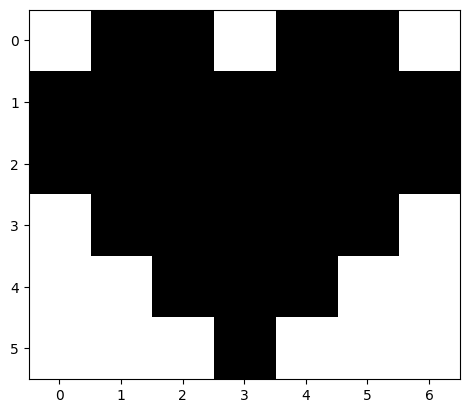

Matriz U: 
 
 [[ 3.61249460e-01 -4.38468638e-16  7.30296743e-01 -5.32180543e-02
  -2.63150853e-01  5.13891975e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
   6.29386561e-01  3.22292657e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
  -6.29386561e-01 -3.22292657e-01]
 [ 4.45394592e-01 -3.53553391e-01  2.73861279e-01  5.17967494e-01
   2.63150853e-01 -5.13891975e-01]
 [ 2.77104327e-01 -7.07106781e-01 -1.82574186e-01 -6.24403602e-01
   2.49800181e-16  1.62196645e-16]
 [ 8.41451321e-02 -3.53553391e-01 -4.56435465e-01  5.71185548e-01
  -2.63150853e-01  5.13891975e-01]] 
 

Matriz Sigma: 
 
 [4.73981604e+00 1.41421356e+00 1.41421356e+00 7.30851490e-01
 1.49190666e-16 1.82188799e-17] 
 

Matriz V: 
 
 [[ 2.28647772e-01  3.98832447e-01  4.57295545e-01  3.98832447e-01
   4.57295545e-01  3.98832447e-01  2.28647772e-01]
 [ 5.00000000e-01  2.50000000e-01 -2.50000000e-01 -5.00000000e-01
  -2.50000000e-01  2.50000000e-01  5.00000000e-01]
 [-3.8729833

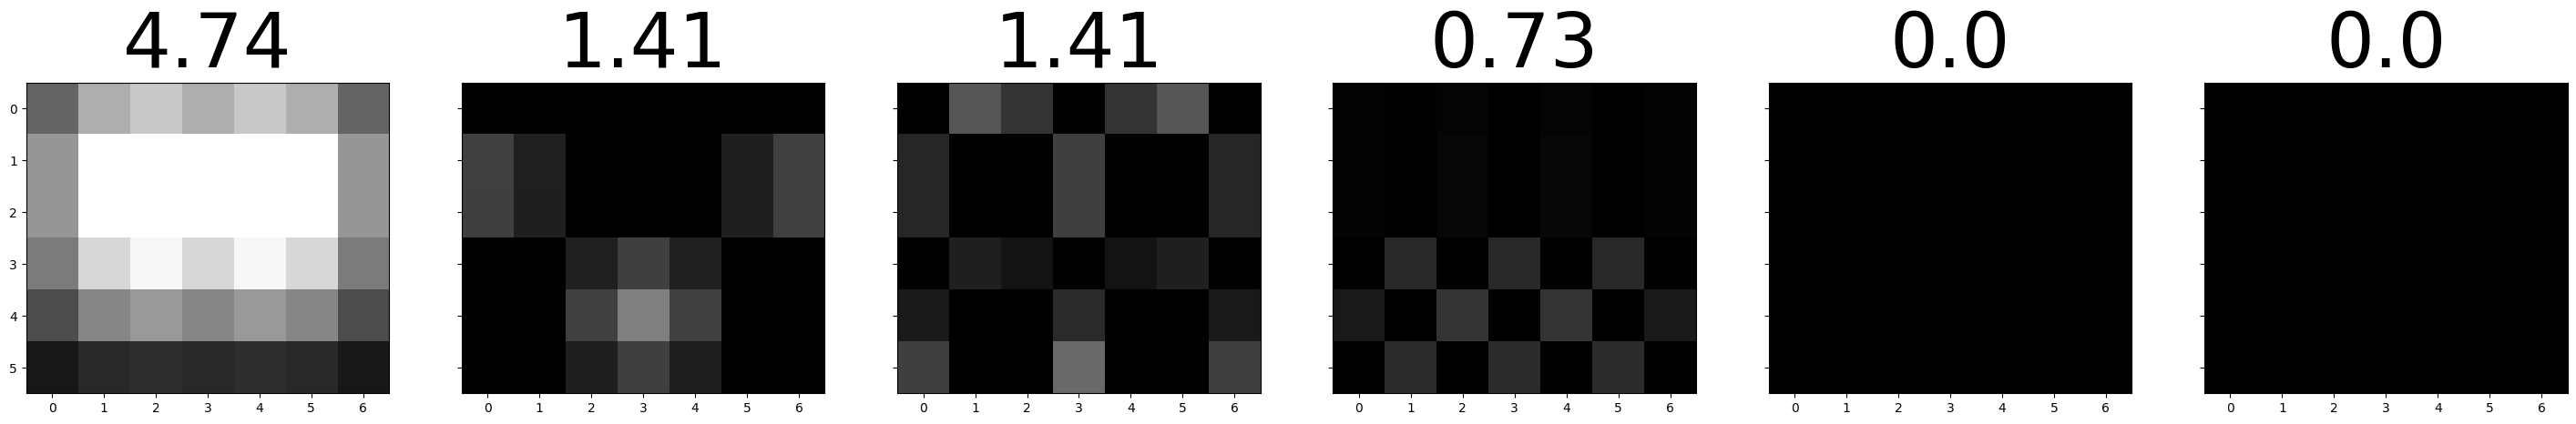

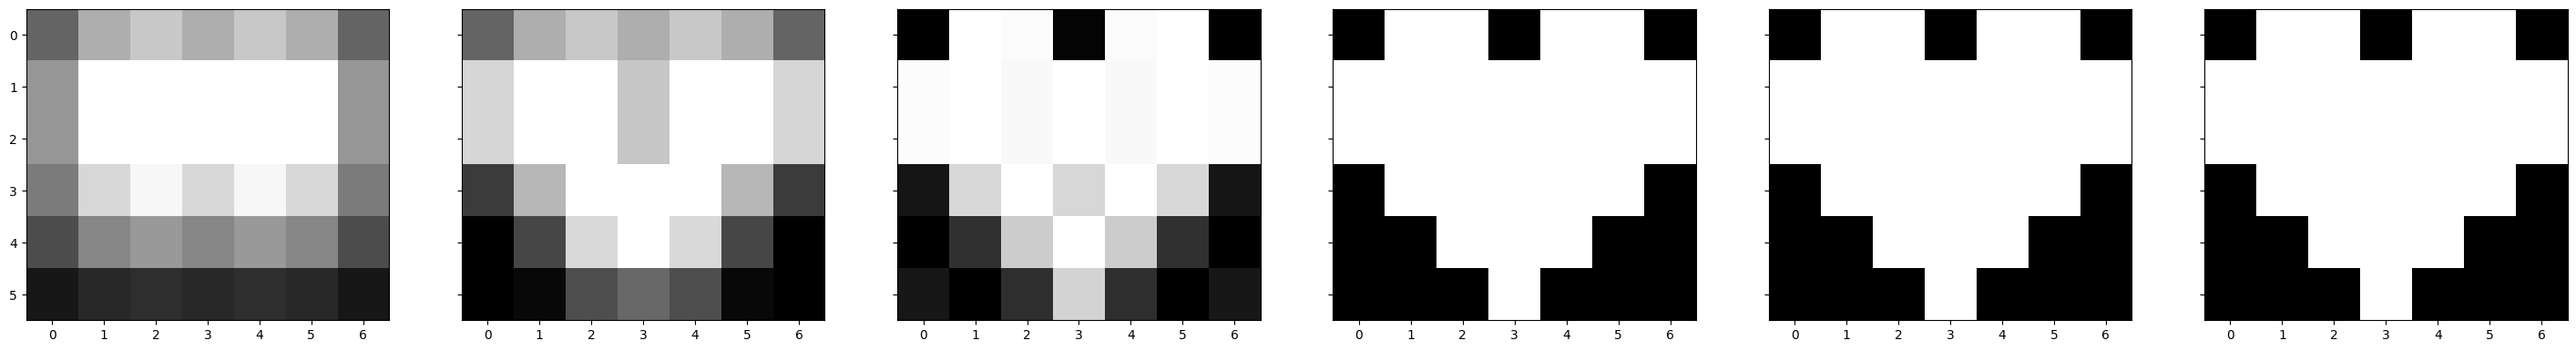

In [4]:
U, S, V = plot_svd(D)

> La primera imagen muestra la matriz _A_ graficada, donde podemos verificar que se trata de un corazon.

> La matriz sigma solo nos devuelve un vector con los autovalores. No nos devuelve la matriz diagonal con los demas elementos ceros.

> Al final se muestra la reconstruccion progresiva de la imagen usando los diferentes autovalores. La primera fila muestra la informacion que capta cada autovalor. La segunda fila muestra la informacion acumulada hasta dicho autovalor. 

> Los autovalores nos indican cual es la informacion que me aporta quedarme con ese autovalor y los autovectores asociados

> El primer autovalor (4.74) y sus respectivos autovectores, recogen una gran cantidad de informacion de la matriz original aunque poco definida.

> El segundo autovalor (1.41) individualmente, capta menos informacion que el primero, pero si nos quedamos con los dos primeros autovalores, lo que implica pasar de 6 dimensiones a 2, obtenemos una mayor cantidad de informacion de la matriz original y ya podemos inferir que se trata de un corazon

> Si tomamos los tres primeros autovalores, lo que implica pasar de 6 a 3 dimensiones, la informacion capturada muestra claramente que se trata de un corazon aunque no se ve del todo definido.

> Si tomamos los 4 primeros autovalores, ya vemos definidamente que se trata de un corazon. Puede que se pierda alguna informacion pero no es relevante en cuanto a la figura del corazon. 

> En definitiva, la funcion SVD nos muestra que podemos seleccionar una cantidad de dimensiones menor a las dimensiones de los datos y final obtener una aproximacion bastante buena a los datos originales


## Trabajando sobre una imagen en blanco y negro

Vamos a utilizar __SVD__ para realizar una compresion de imagen y mostrar como se pierde informacion a medida que se reducen las dimensiones.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage.io import imread
from numpy.linalg import svd
from matplotlib.pyplot import imshow

from PIL import Image

In [6]:
# leer imagen
img = imread('edificio_px.jpg')
img.shape

(188, 336, 3)

> La imagen tiene 188 x 336 pixeles

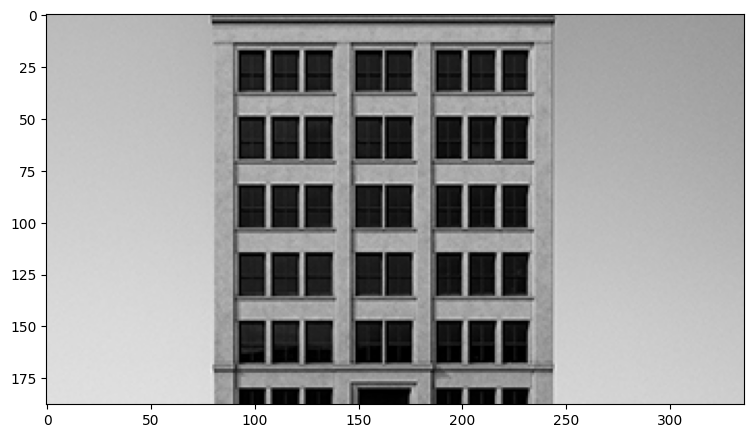

In [7]:
# abrir imagen con PIL
img = Image.open('edificio_px.jpg')

# convertir imagen en escala de grises
# L: luminancia
# A: canal alfa (transparencia)
imggray = img.convert('LA')

# definir dimensiones de la imagen
x, y = (188, 336)
# crear lienzo
plt.figure(figsize=(9,6))
# mostrar imagen en escala de grises
plt.imshow(imggray)
plt.show()

Vamos a llevar la imagen a una representacion matricial con Numpy

In [8]:
imgmat =np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

imgmat

matrix([[186., 186., 185., ..., 154., 152., 151.],
        [186., 187., 186., ..., 153., 151., 155.],
        [188., 187., 188., ..., 153., 154., 155.],
        ...,
        [222., 224., 225., ..., 207., 204., 205.],
        [222., 221., 224., ..., 206., 203., 205.],
        [223., 221., 223., ..., 205., 205., 206.]], shape=(188, 336))

Para verificar que la matriz 'imgmat' tiene la informacion de la imagen, vamos a graficar los datos de la matriz

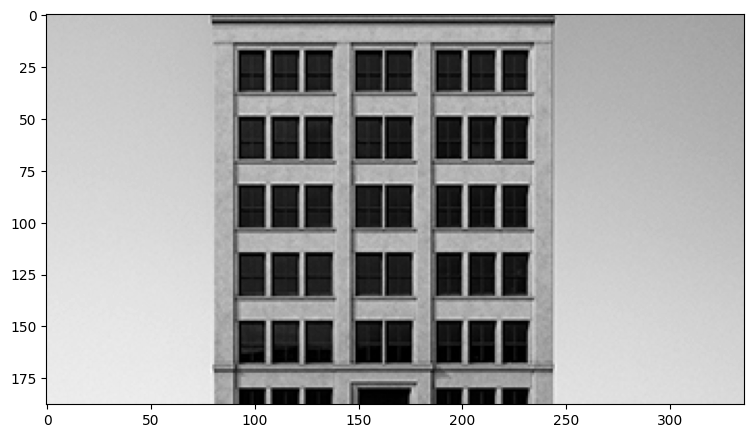

In [9]:
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')
plt.show()

Continuamos aplicando la descomposicion en valores singulares

In [10]:
u, s, v = np.linalg.svd(imgmat)

Ahora, procedemos a calcular la informacion que aporta cada autovalor

In [11]:
# asignar vector con autovalores a una variable
auto_valores = s

# suma de todos los autovalores elevados al cuadrado 
info_total = sum(auto_valores**2)

# autovalores elevados al cuadrado
av_pow = auto_valores**2

# porcentaje de informacion dado por cada autovalor
info_pct = ((av_pow/info_total)*100)

print(info_pct)

[9.46428079e+01 4.85898959e+00 3.00459257e-01 4.12676307e-02
 3.30097983e-02 2.72070849e-02 1.84062379e-02 1.67392031e-02
 9.37905679e-03 7.30499367e-03 6.21433699e-03 3.78798391e-03
 2.03284111e-03 1.69490936e-03 1.61666594e-03 1.50376691e-03
 1.41790341e-03 1.15912381e-03 1.06682388e-03 9.59621188e-04
 9.21177591e-04 8.81345556e-04 8.34251828e-04 7.49367633e-04
 7.31574197e-04 6.82832829e-04 6.71958398e-04 6.06757211e-04
 5.93615716e-04 5.69663199e-04 5.28325702e-04 5.09897915e-04
 4.86026939e-04 4.71953198e-04 4.51697893e-04 4.46206421e-04
 4.23553279e-04 4.05305118e-04 3.95470119e-04 3.83421681e-04
 3.73799044e-04 3.44479812e-04 3.33242530e-04 3.16152124e-04
 3.12785391e-04 3.00913176e-04 2.91144796e-04 2.80559925e-04
 2.66586250e-04 2.63014215e-04 2.55408662e-04 2.42109134e-04
 2.30852698e-04 2.26329651e-04 2.24615568e-04 2.11600546e-04
 2.08054597e-04 2.05769358e-04 1.87609861e-04 1.82639965e-04
 1.81820594e-04 1.75897557e-04 1.71743841e-04 1.62234536e-04
 1.56790207e-04 1.543457

Realizamos el calculo de cuanta informacion se va acumulando con cada autovalor

In [15]:
acumulated_info = 0

for i in range(len(info_pct)):
    acumulated_info = acumulated_info + info_pct[i]
    print('Numero de valor singular ' + str(i+1) + ': ' + str(auto_valores[i]) + ' ' + str(round(acumulated_info, 2)) + '%')

Numero de valor singular 1: 39918.98776720683 94.64%
Numero de valor singular 2: 9045.002598197316 99.5%
Numero de valor singular 3: 2249.2022359050547 99.8%
Numero de valor singular 4: 833.5669355578008 99.84%
Numero de valor singular 5: 745.5163066858482 99.88%
Numero de valor singular 6: 676.8255078032633 99.9%
Numero de valor singular 7: 556.6961616963539 99.92%
Numero de valor singular 8: 530.8882350591585 99.94%
Numero de valor singular 9: 397.38849976743995 99.95%
Numero de valor singular 10: 350.70796856947527 99.96%
Numero de valor singular 11: 323.46933229504225 99.96%
Numero de valor singular 12: 252.54558139391025 99.97%
Numero de valor singular 13: 185.00668820905705 99.97%
Numero de valor singular 14: 168.93084383362637 99.97%
Numero de valor singular 15: 164.98552998316958 99.97%
Numero de valor singular 16: 159.12044126362048 99.97%
Numero de valor singular 17: 154.5108689919649 99.97%
Numero de valor singular 18: 139.70135728086092 99.97%
Numero de valor singular 19: 1

> La matriz que trabajamos tiene 188 dimensiones, por tanto, se generan 188 valores singulares (autovectores)

> El primer valor singular aporta el 94.64% de la informacion total de los datos. Es decir, si solo nos quedamos con esta dimension obtendriamos el 94.64% de la vaiabilidad de los datos.

> Si nos quedamos con los 10 primeros valores singulares obtendriamos el 99.96% de la variabilidad de los datos.

> Con pasar de 188 a solo 10 dimensiones obtendriamos casi la totalidad de la variabilidad de los datos.

Lo siguiente es realizar un plot de los valores signulares. Podemos ir reduciendo el rango para verificar algun posible codo y de esta forma obtener la dimensionalidad intrinseca de los datos.

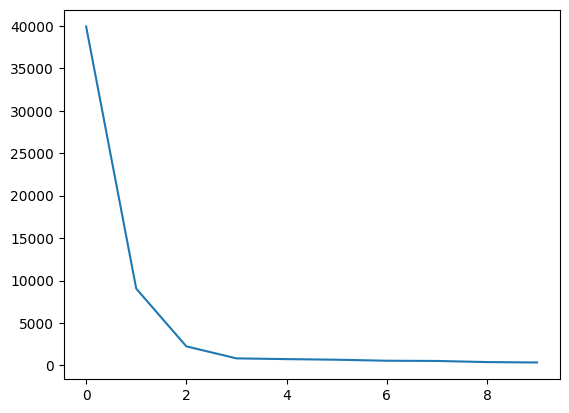

In [17]:
plt.plot(s[:10])
plt.show()

> La grafica nos muestra que consideando los 3 primeros autovalores ya es suficiente para tomar mas del 99% de variabilidad de los datos.

## Reconstruyendo la imagen a partir de los datos reducidos

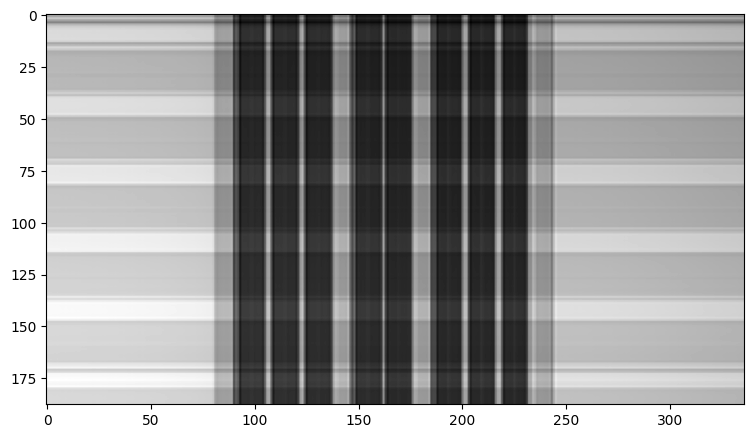

In [ ]:
# considerando el primero autovalor
rencostr_img = np.matrix(u[:, :1])*np.diag(s[:1])*np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(rencostr_img, cmap='gray')
plt.show()

> Claramente vemos que el primer autovalor capta una gran parte de la informacion. Podemos ver que se recoje las columnas y lineas de la imagen original

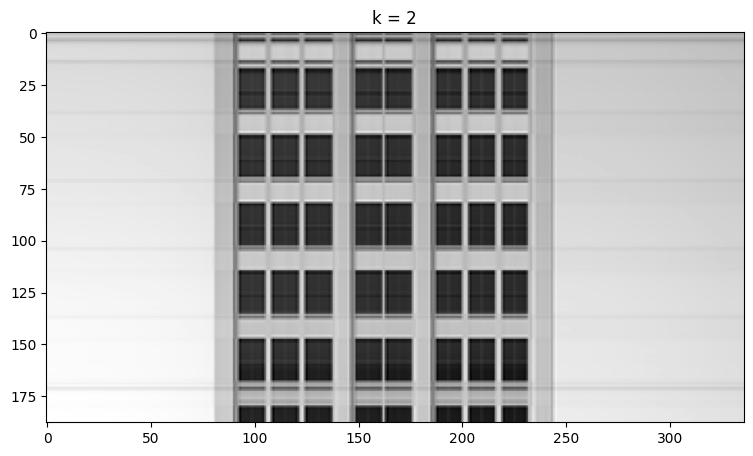

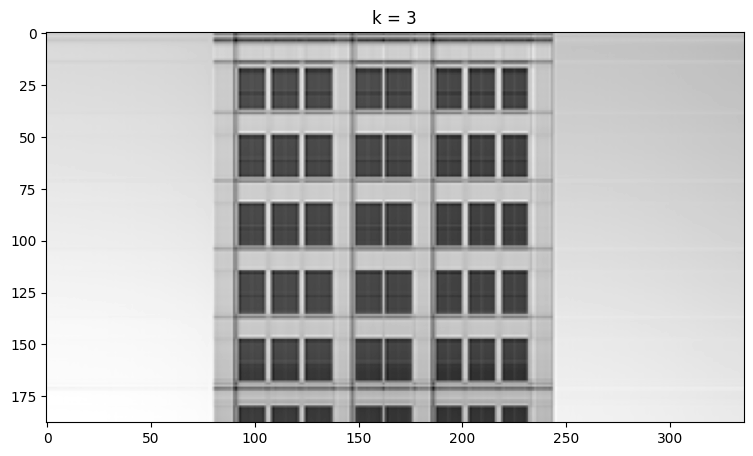

In [20]:
# considerando los dos y tres primero autovalores
for i in range(2,4):
    rencostr_img = np.matrix(u[:, :i])*np.diag(s[:i])*np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(rencostr_img, cmap='gray')
    plt.title('k = ' + str(i))
    plt.show()

> Notese que considerando los 2 primeros autovalores ya se puede distinguir lo que hay en la imagen.

> Considerando los 3 primeros autovalores se muestran mas detalles en la imagen